# 웹 스크래핑 프로그램 만들어보자
1. 예제 페이지에서 여행기사를 추출한다.   
https://korean.visitkorea.or.kr/main/main.do
2. 검색어와 스크래핑 건수를 입력받는다.
3. 페이지를 이동한다.
4. 상세 페이지별로 여행기사 정보를 수집한다.
5. 이미지와 텍스트를 추출해서 파일로 저장까지

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import math, time

options = Options()
options.add_argument('--window-size=1500,1047')
options.add_argument('--window-position=0,0')
options.add_experimental_option("detach", True)

In [2]:
search = input('검색어:')
cnt = int(input('크롤링 할 건수는 몇건입니까?: '))
page_cnt = math.ceil(cnt / 10)  # 크롤링 할 전체 페이지 수 

검색어: 서울
크롤링 할 건수는 몇건입니까?:  11


In [35]:
URL = 'https://korean.visitkorea.or.kr/search/search_list.do?keyword='+search
driver = webdriver.Chrome(options=options)
driver.get(URL)
time.sleep(3)

In [36]:
# 여행기사 더보기 클릭
# driver.find_element(By.CSS_SELECTOR, ".more_view").click() 중복주의
driver.find_element(By.CSS_SELECTOR, "#s_recommend > .more_view > a").click()

In [5]:
# 제목 추출
# 왜 길이가 34일까?
result = driver.find_elements(By.CSS_SELECTOR,'.tit a')
len(result)

32

In [6]:
for i in result:
    print(i.text)























서울 근교 여행, 아이와 나들이 떠나는 인천 여행 코스
자연도 즐기고 역사도 되짚어보고, 서울식물원과 식민지역사박물관
소확행 찾아 카페행, 야외 정원이 있는 서울 카페 4
낯익은 길목에 담긴 근대사의 함성과 눈물, 서울 도심 투어
한가로운 여행, 책과 서울
다 같이 돌자 서울 한 바퀴~ 405번 버스 여행
높은 곳에서 보는 높은 가을 하늘♡ 서울 전망대 모음 4
대중교통으로 만나는 무장애 여행 '서울 600년'
숲과 강 그리고 야경까지, 서울 도심 속 휴식과 낭만 여행
할머니와 손주가 함께 떠나는 가을날의 서울


### [주의] 동적처리로 인해 숨겨진 코드 정보가 추출된 것
div class "search_all_bg"에 숨겨져 있음
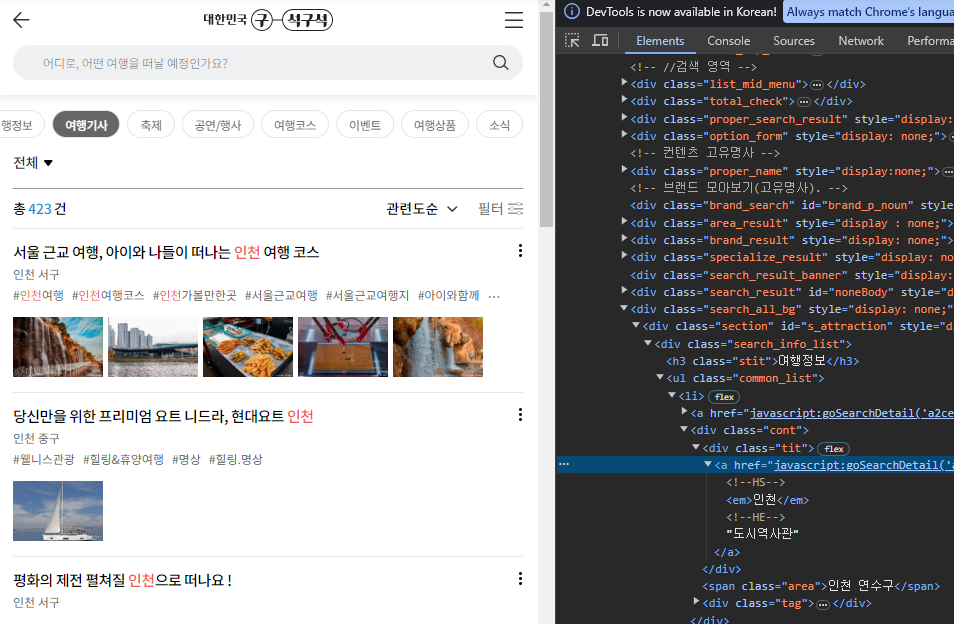

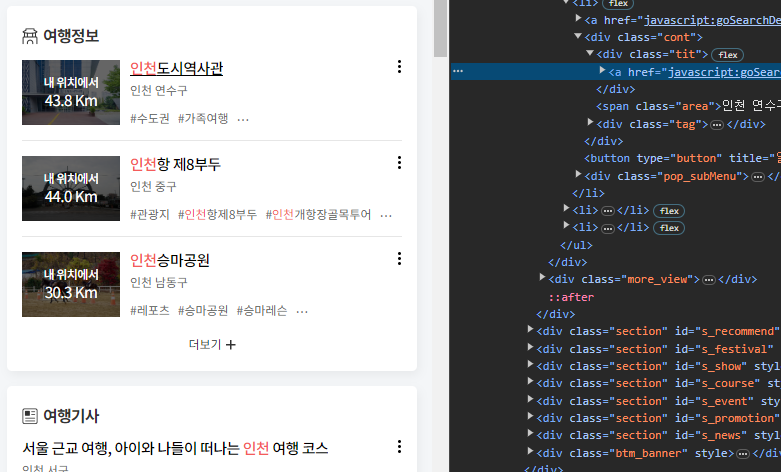

In [41]:
# 더 정확하게 찾아주자
result = driver.find_elements(By.CSS_SELECTOR,'#search_result .tit>a')
len(result)

10

In [42]:
# 한페이지내 콘텐츠별 상세페이지 정보를 추출해보자
# 페이지 로딩시간 고려해서 넉넉히 2~3초 간격을 주자
from bs4 import BeautifulSoup
contents_no = 0

for item in result:
    contents_no += 1
    item.click()
    time.sleep(3)  
    
    print(f'======= [ {contents_no} ]  =======')
    html = driver.page_source

    soup = BeautifulSoup(html, 'lxml')
    title = soup.find(id='topTitle')
    print(title.text)

    driver.back()
    time.sleep(5)

print('==== 완료 ====')

======= [ 1 ]  =======
서울 근교 여행, 아이와 나들이 떠나는 인천 여행 코스
======= [ 2 ]  =======
자연도 즐기고 역사도 되짚어보고, 서울식물원과 식민지역사박물관
======= [ 3 ]  =======
소확행 찾아 카페행, 야외 정원이 있는 서울 카페 4
======= [ 4 ]  =======
낯익은 길목에 담긴 근대사의 함성과 눈물, 서울 도심 투어
======= [ 5 ]  =======
한가로운 여행, 책과 서울
======= [ 6 ]  =======
다 같이 돌자 서울 한 바퀴~ 405번 버스 여행
======= [ 7 ]  =======
높은 곳에서 보는 높은 가을 하늘♡ 서울 전망대 모음 4
======= [ 8 ]  =======
대중교통으로 만나는 무장애 여행 ‘서울 600년’
======= [ 9 ]  =======
숲과 강 그리고 야경까지, 서울 도심 속 휴식과 낭만 여행
======= [ 10 ]  =======
할머니와 손주가 함께 떠나는 가을날의 서울
==== 완료 ====


In [17]:
result = driver.find_elements(By.CSS_SELECTOR,'#search_result .tit>a')
result[0].text

'서울 근교 여행, 아이와 나들이 떠나는 인천 여행 코스'

In [21]:
result[0].click()

In [18]:
from selenium.webdriver.common.keys import Keys

def page_work():
    result = driver.find_elements(By.CSS_SELECTOR,'#search_result .tit>a')
    global contents_no, cnt
    
    for item in result:
        contents_no += 1
        
        if contents_no <= cnt :    
            print(f'[콘텐츠 {contents_no}]')  
            item.send_keys(Keys.ENTER) # .click()은 에러 잘남

            time.sleep(2)
            html = driver.page_source
            html_dom = BeautifulSoup(html, 'lxml')

            title = html_dom.find(id='topTitle')
            print(title.text)
            driver.back()
            time.sleep(2)     

# 페이지이동 스크래핑

In [19]:
contents_no = 0
print('스크래핑 프로그램 실행')

for page_no in range(1, page_cnt+1):    
    print(f'====== {page_no} 페이지 스크래핑 시작 ======')
    page_work()
    print(f'====== {page_no} 페이지 스크래핑 완료 ======')
    if page_no < page_cnt:
        driver.find_element(By.XPATH, f'/html/body/div[3]/div/div[1]/div[15]/a[{page_no+1}]').click()
        time.sleep(2)
print('스크래핑 프로그램 종료')

driver.close()


스크래핑 프로그램 실행
====== 1 페이지 스크래핑 시작 ======
[콘텐츠 1]
서울 근교 여행, 아이와 나들이 떠나는 인천 여행 코스
[콘텐츠 2]
자연도 즐기고 역사도 되짚어보고, 서울식물원과 식민지역사박물관
[콘텐츠 3]
소확행 찾아 카페행, 야외 정원이 있는 서울 카페 4
[콘텐츠 4]
낯익은 길목에 담긴 근대사의 함성과 눈물, 서울 도심 투어
[콘텐츠 5]
한가로운 여행, 책과 서울
[콘텐츠 6]
다 같이 돌자 서울 한 바퀴~ 405번 버스 여행
[콘텐츠 7]
높은 곳에서 보는 높은 가을 하늘♡ 서울 전망대 모음 4
[콘텐츠 8]
대중교통으로 만나는 무장애 여행 ‘서울 600년’
[콘텐츠 9]
숲과 강 그리고 야경까지, 서울 도심 속 휴식과 낭만 여행
[콘텐츠 10]
할머니와 손주가 함께 떠나는 가을날의 서울
====== 1 페이지 스크래핑 완료 ======
====== 2 페이지 스크래핑 시작 ======
[콘텐츠 11]
당신을 위로해 줄 한잔, 서울 수제맥줏집
[콘텐츠 12]
그리고 그것들은 행복하게 다시 쓰였습니다, 세운상가와 서울새활용플라자
[콘텐츠 13]
서울 수제버거 맛집 5선
[콘텐츠 14]
한 곳에서 끝내자! 서울 복합문화공간 4
[콘텐츠 15]
서울 지하철 타고 도심 속으로 일출 여행 간다
====== 2 페이지 스크래핑 완료 ======
스크래핑 프로그램 종료


## 상세페이지 콘텐츠도 함께 추출해서 파일로 저장

In [13]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
import math, time, pandas as pd, urllib.request

options = Options()
options.add_argument('--window-size=974,1047')
options.add_argument('--window-position=953,0')
options.add_experimental_option("detach", True)

In [12]:
search = input('검색어:')
cnt = int(input('스크래핑 할 건수는 몇건입니까?: '))
page_cnt = math.ceil(cnt / 10)  # 크롤링 할 전체 페이지 수 

검색어:인천
스크래핑 할 건수는 몇건입니까?: 15


In [13]:
URL = 'https://korean.visitkorea.or.kr/search/search_list.do?keyword='+search
driver = webdriver.Chrome(options=options)
driver.get(URL)
time.sleep(2)

In [ ]:
# 여행기사 더보기 클릭
# driver.find_element(By.CSS_SELECTOR, ".more_view").click() 중복주의
driver.find_element(By.CSS_SELECTOR, "#s_recommend > .more_view > a").click()

In [15]:
title_list = []
contents_list = []

def page_work():
    result = driver.find_elements(By.CSS_SELECTOR,'#search_result .tit>a')
    global contents_no, cnt
    global title_list, contents_list
    
    for item in result:
        contents_no += 1
        
        if contents_no <= cnt :    
            print(f'[콘텐츠 {contents_no}]')  
            item.send_keys(Keys.ENTER) # .click()은 에러 잘남

            time.sleep(2)
            html = driver.page_source
            html_dom = BeautifulSoup(html, 'lxml')

            title = html_dom.find(id='topTitle')
            title_list.append(title.text)
            print(title.text)
            
            contents = driver.find_elements(By.CLASS_NAME, 'txt_p')
            contents_merge = ' '.join([item.text for item in contents])        
            contents_list.append(contents_merge)
            
            driver.back()
            time.sleep(2)     

In [16]:
contents_no = 0
today = time.localtime()
print('스크래핑 프로그램 실행')

for page_no in range(1, page_cnt+1):    
    print(f'====== {page_no} 페이지 스크래핑 시작 ======')
    page_work()
    print(f'====== {page_no} 페이지 스크래핑 완료 ======')
    
    DF = pd.DataFrame({"제목":title_list, "내용":contents_list})
    filename = f'{search}여행기사_{cnt}건_{today.tm_year}{today.tm_mon}{today.tm_mday}.xlsx'
    DF.to_excel(filename)
    print(f'====== {page_no} 페이지 {filename}파일 저장 완료 ======')
    
    if page_no < page_cnt:
        driver.find_element(By.XPATH, f'/html/body/div[3]/div/div[1]/div[15]/a[{page_no+1}]').click()
        time.sleep(2)
                   
print('스크래핑 프로그램 종료')
driver.close()

스크래핑 프로그램 실행
====== 1 페이지 스크래핑 시작 ======
[콘텐츠 1]
서울 근교 여행, 아이와 나들이 떠나는 인천 여행 코스
[콘텐츠 2]
짜장면이 태어난 차이나타운의 먹자골목, 인천 북성동원조자장면거리와 짜장면박물관
[콘텐츠 3]
인천 여행, 선선한 저녁에 즐기는 인천 야경 명소 4
[콘텐츠 4]
낭만과 그리움을 찾아서, 인천 경인아라뱃길 정서진 드라이브
[콘텐츠 5]
견공의, 견공에 의한, 견공을 위한 놀이 공간 인천대공원 반려견놀이터
[콘텐츠 6]
과거부터 현재까지, 인천으로 떠나는 시간 여행
[콘텐츠 7]
개항로라 쓰고 뉴트로라 읽는다! 스마트하게 즐기는 인천 Next Level 여행지 8
[콘텐츠 8]
옛 감성 물씬, 인천 구도심(동인천) 테마여행
[콘텐츠 9]
우리나라 최초의 등대, 인천 팔미도등대
[콘텐츠 10]
[인천] 도심 속 공원으로 떠나는 비대면 힐링여행 인천 송도 센트럴파크 & 소래습지생태공원
====== 1 페이지 스크래핑 완료 ======
====== 1 페이지 인천여행기사_15건_20231025.xlsx파일 저장 완료 ======
====== 2 페이지 스크래핑 시작 ======
[콘텐츠 11]
인천 여행, 아이들과 다녀오기 좋은 당일치기 코스
[콘텐츠 12]
지금 기억하는 어제의 풍경, 인천 개항장 거리
[콘텐츠 13]
[인천 당일치기 여행] 부지런히 먹으러 가는 인천 개항장거리 먹투어
[콘텐츠 14]
낡을수록 빛나는 옛 건물의 재발견,인천 개항장 아날로그 산책
[콘텐츠 15]
2022 필더리듬오브코리아! 한국관광 홍보영상 #인천 Feel the Rhythm of Korea -  INCHEON
====== 2 페이지 스크래핑 완료 ======
====== 2 페이지 인천여행기사_15건_20231025.xlsx파일 저장 완료 ======
스크래핑 프로그램 종료


## 이미지 추출 기능 추가

In [14]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
import math, time, os, pandas as pd

options = Options()
options.add_argument('--window-size=974,1047')
options.add_argument('--window-position=953,0')
options.add_experimental_option("detach", True)

In [15]:
search = input('검색어:')
cnt = int(input('스크래핑 할 건수는 몇건입니까?: '))
page_cnt = math.ceil(cnt / 10)  # 크롤링 할 전체 페이지 수 

검색어:인천
스크래핑 할 건수는 몇건입니까?: 15


In [16]:
now = time.localtime()
date_format = '%04d%02d%02d'%(now.tm_year, now.tm_mon, now.tm_mday)
f_dir = f'{os.getcwd()}\\{search}여행기사_{cnt}건_{date_format}'
os.makedirs(f_dir)

In [17]:
URL = 'https://korean.visitkorea.or.kr/search/search_list.do?keyword='+search
driver = webdriver.Chrome(options=options)
driver.get(URL)
time.sleep(2)
# 여행기사 더보기 클릭
driver.find_element(By.CSS_SELECTOR, "#s_recommend > .more_view > a").click()
time.sleep(2)

In [18]:
title_list = []
contents_list = []
img_url_list = []

def page_work():
    result = driver.find_elements(By.CSS_SELECTOR,'#search_result .tit>a')
    global contents_no, cnt
    global title_list, contents_list, img_url_list
    
    for item in result:
        contents_no += 1
        
        if contents_no <= cnt :    
            print(f'[콘텐츠 {contents_no}]')  
            item.send_keys(Keys.ENTER) # .click()은 에러 잘남

            time.sleep(2)
            
            # 이미지 추출을 위해 미리 스크롤
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight)")
            
            html = driver.page_source
            html_dom = BeautifulSoup(html, 'lxml')

            title = html_dom.find(id='topTitle')
            title_list.append(title.text)
            print(title.text)
            
            img_tag_list = html_dom.select('.img_typeBox img')
            img_url_list = [item['src'] for item in img_tag_list]

            contents = driver.find_elements(By.CLASS_NAME, 'txt_p')
            contents_merge = ' '.join([item.text for item in contents])        
            contents_list.append(contents_merge)           
            
            driver.back()
            time.sleep(2)     

In [19]:
def file_export():
    
    DF = pd.DataFrame({"제목":title_list, "내용":contents_list})
    filename = f'{search}여행기사_{cnt}건_{date_format}.xlsx'
    DF.to_excel(f_dir+'\\'+filename)
    print(f'====== {page_no} 페이지 {filename} 파일 저장 완료 ======')
    
    
    no = 0
    for src in img_url_list:
        # 다운로드  (주소, 파일이름)
        urllib.request.urlretrieve(src, f'{f_dir}\\{page_no}_{no}.jpg')
        no += 1
    print(f'====== {page_no} 페이지 {f_dir} 디렉토리 이미지 저장 완료 ======')

In [20]:
contents_no = 0
today = time.localtime()
print('스크래핑 프로그램 실행')

for page_no in range(1, page_cnt+1):    
    print(f'====== {page_no} 페이지 스크래핑 시작 ======')
    page_work()
    print(f'====== {page_no} 페이지 스크래핑 작업중 ======')
    file_export()
    print(f'====== {page_no} 페이지 스크래핑 완료 ======')
    if page_no < page_cnt:
        driver.find_element(By.XPATH, f'/html/body/div[3]/div/div[1]/div[15]/a[{page_no+1}]').click()
        time.sleep(2)
                   
print('스크래핑 프로그램 종료')
driver.close()

스크래핑 프로그램 실행
====== 1 페이지 스크래핑 시작 ======
[콘텐츠 1]
서울 근교 여행, 아이와 나들이 떠나는 인천 여행 코스
[콘텐츠 2]
인천 여행, 선선한 저녁에 즐기는 인천 야경 명소 4
[콘텐츠 3]
인천 근현대사 중심지, 시민의 공간이 되다! 인천시민애집
[콘텐츠 4]
짜장면이 태어난 차이나타운의 먹자골목, 인천 북성동원조자장면거리와 짜장면박물관
[콘텐츠 5]
낭만과 그리움을 찾아서, 인천 경인아라뱃길 정서진 드라이브
[콘텐츠 6]
견공의, 견공에 의한, 견공을 위한 놀이 공간 인천대공원 반려견놀이터
[콘텐츠 7]
[인천] 도심 속 공원으로 떠나는 비대면 힐링여행 인천 송도 센트럴파크 & 소래습지생태공원
[콘텐츠 8]
개항로라 쓰고 뉴트로라 읽는다! 스마트하게 즐기는 인천 Next Level 여행지 8
[콘텐츠 9]
옛 감성 물씬, 인천 구도심(동인천) 테마여행
[콘텐츠 10]
과거부터 현재까지, 인천으로 떠나는 시간 여행
====== 1 페이지 스크래핑 작업중 ======
====== 1 페이지 인천여행기사_15건_20231031.xlsx 파일 저장 완료 ======
====== 1 페이지 C:\workspace\test\Data_Collection\인천여행기사_15건_20231031 디렉토리 이미지 저장 완료 ======
====== 1 페이지 스크래핑 완료 ======
====== 2 페이지 스크래핑 시작 ======
[콘텐츠 11]
우리나라 최초의 등대, 인천 팔미도등대
[콘텐츠 12]
인천 여행, 아이들과 다녀오기 좋은 당일치기 코스
[콘텐츠 13]
지금 기억하는 어제의 풍경, 인천 개항장 거리
[콘텐츠 14]
[인천 당일치기 여행] 부지런히 먹으러 가는 인천 개항장거리 먹투어
[콘텐츠 15]
뚜벅이로 떠나는 당일치기 인천 중구 인생샷 여행!
====== 2 페이지 스크래핑 작업중 ======
====== 2 페이지 인천여행기사_15건_20231031.xlsx 파일 저장 완료 ======
====== 2 페이지 C:\work

## pyinstaller로 실행 파일 만들기

In [31]:

from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
import math, time, os, pandas as pd, urllib.request

options = Options()
options.add_argument('--window-size=1500,1047')
options.add_argument('--window-position=0,0')
options.add_experimental_option("detach", True)

search = input('검색어:')
cnt = int(input('스크래핑 할 건수는 몇건입니까?: '))
page_cnt = math.ceil(cnt / 10)  # 크롤링 할 전체 페이지 수 

now = time.localtime()
date_format = '%04d%02d%02d'%(now.tm_year, now.tm_mon, now.tm_mday)
f_dir = f'{os.getcwd()}\\{search}여행기사_{cnt}건_{date_format}'
os.makedirs(f_dir)

URL = 'https://korean.visitkorea.or.kr/search/search_list.do?keyword='+search
driver = webdriver.Chrome(options=options)
driver.get(URL)
time.sleep(2)
# 여행기사 더보기 클릭
driver.find_element(By.CSS_SELECTOR, "#s_recommend > .more_view > a").click()
time.sleep(2)

title_list = []
contents_list = []
img_url_list = []

def page_work():
    result = driver.find_elements(By.CSS_SELECTOR,'#search_result .tit>a')
    global contents_no, cnt
    global title_list, contents_list, img_url_list
    
    for item in result:
        contents_no += 1
        
        if contents_no <= cnt :    
            print(f'[콘텐츠 {contents_no}]')  
            item.send_keys(Keys.ENTER) # .click()은 에러 잘남

            time.sleep(2)
            
            # 이미지 추출을 위해 미리 스크롤
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight)")
            
            html = driver.page_source
            html_dom = BeautifulSoup(html, 'lxml')

            title = html_dom.find(id='topTitle')
            title_list.append(title.text)
            print(title.text)
            
            img_tag_list = html_dom.select('.img_typeBox img')
            img_url_list = [item['src'] for item in img_tag_list]

            contents = driver.find_elements(By.CLASS_NAME, 'txt_p')
            contents_merge = ' '.join([item.text for item in contents])        
            contents_list.append(contents_merge)           
            
            driver.back()
            time.sleep(2)     


def file_export():
    
    DF = pd.DataFrame({"제목":title_list, "내용":contents_list})
    filename = f'{search}여행기사_{cnt}건_{date_format}.xlsx'
    DF.to_excel(f_dir+'\\'+filename)
    print(f'====== {page_no} 페이지 {filename} 파일 저장 완료 ======')
    
    
    no = 0
    for src in img_url_list:
        # 다운로드  (주소, 파일이름)
        urllib.request.urlretrieve(src, f'{f_dir}\\{page_no}_{no}.jpg')
        no += 1
    print(f'====== {page_no} 페이지 {f_dir} 디렉토리 이미지 저장 완료 ======')


contents_no = 0
today = time.localtime()
print('스크래핑 프로그램 실행')

for page_no in range(1, page_cnt+1):    
    print(f'====== {page_no} 페이지 스크래핑 시작 ======')
    page_work()
    print(f'====== {page_no} 페이지 스크래핑 작업중 ======')
    file_export()
    print(f'====== {page_no} 페이지 스크래핑 완료 ======')
    if page_no < page_cnt:
        driver.find_element(By.XPATH, f'/html/body/div[3]/div/div[1]/div[15]/a[{page_no+1}]').click()
        time.sleep(2)
                   
print('스크래핑 프로그램 종료')
driver.close()

검색어: 서울
스크래핑 할 건수는 몇건입니까?:  60


스크래핑 프로그램 실행
====== 1 페이지 스크래핑 시작 ======
[콘텐츠 1]
서울 근교 여행, 아이와 나들이 떠나는 인천 여행 코스
[콘텐츠 2]
자연도 즐기고 역사도 되짚어보고, 서울식물원과 식민지역사박물관
[콘텐츠 3]
소확행 찾아 카페행, 야외 정원이 있는 서울 카페 4
[콘텐츠 4]
낯익은 길목에 담긴 근대사의 함성과 눈물, 서울 도심 투어
[콘텐츠 5]
한가로운 여행, 책과 서울
[콘텐츠 6]
다 같이 돌자 서울 한 바퀴~ 405번 버스 여행
[콘텐츠 7]
높은 곳에서 보는 높은 가을 하늘♡ 서울 전망대 모음 4
[콘텐츠 8]
대중교통으로 만나는 무장애 여행 ‘서울 600년’
[콘텐츠 9]
숲과 강 그리고 야경까지, 서울 도심 속 휴식과 낭만 여행
[콘텐츠 10]
할머니와 손주가 함께 떠나는 가을날의 서울
====== 1 페이지 스크래핑 작업중 ======
====== 1 페이지 서울여행기사_60건_20231213.xlsx 파일 저장 완료 ======
====== 1 페이지 C:\workspace\python\WASSUP\서울여행기사_60건_20231213 디렉토리 이미지 저장 완료 ======
====== 1 페이지 스크래핑 완료 ======
====== 2 페이지 스크래핑 시작 ======
[콘텐츠 11]
당신을 위로해 줄 한잔, 서울 수제맥줏집
[콘텐츠 12]
그리고 그것들은 행복하게 다시 쓰였습니다, 세운상가와 서울새활용플라자
[콘텐츠 13]
서울 수제버거 맛집 5선
[콘텐츠 14]
한 곳에서 끝내자! 서울 복합문화공간 4
[콘텐츠 15]
서울 지하철 타고 도심 속으로 일출 여행 간다
[콘텐츠 16]
인생사진 찍기 좋은 서울&경기 가을꽃 컬렉션
[콘텐츠 17]
맥주 덕후가 사랑한 서울 수제맥주 브루펍 3
[콘텐츠 18]
브라보 마이 잉여 라이프! 집순이도 반할 서울 잉여력 상승 스팟 5
[콘텐츠 19]
혼자만의 시간, 여유롭게 즐기는 서울의 작은 책방 3
[콘텐츠 20]
관광정보 웹툰 「조선손님유람기」 28화 서울밤도깨비야시장 편
=

StaleElementReferenceException: Message: stale element reference: stale element not found
  (Session info: chrome=120.0.6099.71); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#stale-element-reference-exception
Stacktrace:
	GetHandleVerifier [0x00007FF763D94D02+56194]
	(No symbol) [0x00007FF763D004B2]
	(No symbol) [0x00007FF763BA76AA]
	(No symbol) [0x00007FF763BB79BF]
	(No symbol) [0x00007FF763BADB89]
	(No symbol) [0x00007FF763BABF22]
	(No symbol) [0x00007FF763BAF38F]
	(No symbol) [0x00007FF763BAF480]
	(No symbol) [0x00007FF763BF247C]
	(No symbol) [0x00007FF763BF2592]
	(No symbol) [0x00007FF763BE92EB]
	(No symbol) [0x00007FF763C15E7A]
	(No symbol) [0x00007FF763BE6226]
	(No symbol) [0x00007FF763C16320]
	(No symbol) [0x00007FF763C32786]
	(No symbol) [0x00007FF763C15C23]
	(No symbol) [0x00007FF763BE4A45]
	(No symbol) [0x00007FF763BE5AD4]
	GetHandleVerifier [0x00007FF76410D5BB+3695675]
	GetHandleVerifier [0x00007FF764166197+4059159]
	GetHandleVerifier [0x00007FF76415DF63+4025827]
	GetHandleVerifier [0x00007FF763E2F029+687785]
	(No symbol) [0x00007FF763D0B508]
	(No symbol) [0x00007FF763D07564]
	(No symbol) [0x00007FF763D076E9]
	(No symbol) [0x00007FF763CF8094]
	BaseThreadInitThunk [0x00007FFC405C7344+20]
	RtlUserThreadStart [0x00007FFC40EE26B1+33]


# 윈도우 작업 스케줄러에 등록하여 자동화하기

In [45]:
var1 = 5
var2 = 10

def test() :
    global var1
    global var2
    var1 = 20
    var2 = 30
test()
print(var1+var2)

50
